In [7]:
import pandas as pd

filePath = "./Dataset/MusicInfo.csv"
df = pd.read_csv(filePath)

df.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the MP3 file
file_path = './Dataset/MP3-Example/Blues/Blues-TRACOHF128F1498509.mp3'  # Replace with your MP3 file path
y, sr = librosa.load(file_path)

# Generate the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()

# Save the plot as an image
plt.savefig('spectrogram.png')  # Change the name as desired

# Show the plot
plt.show()


Converted ./Dataset/MP3-Example\Blues\Blues-TRACOHF128F1498509.mp3 to ./OutputSpectrograms/Blues\Blues-TRACOHF128F1498509.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRADWSG128F4259317.mp3 to ./OutputSpectrograms/Blues\Blues-TRADWSG128F4259317.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRAELUY128F93147BA.mp3 to ./OutputSpectrograms/Blues\Blues-TRAELUY128F93147BA.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRAHVWB128F9308FB0.mp3 to ./OutputSpectrograms/Blues\Blues-TRAHVWB128F9308FB0.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRAJGIO128F92E84BC.mp3 to ./OutputSpectrograms/Blues\Blues-TRAJGIO128F92E84BC.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRAOPNA128F427E83F.mp3 to ./OutputSpectrograms/Blues\Blues-TRAOPNA128F427E83F.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRAQGFP128E078FAB6.mp3 to ./OutputSpectrograms/Blues\Blues-TRAQGFP128E078FAB6.png
Converted ./Dataset/MP3-Example\Blues\Blues-TRARJEK128F930B3AA.mp3 to ./OutputSpectrograms/Blues\Blues-TRARJEK128F930B

KeyboardInterrupt: 

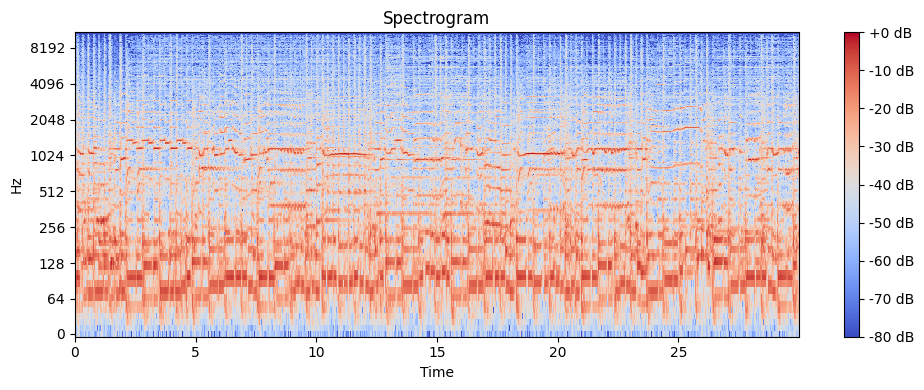

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the source and destination directories
source_dir = './Dataset/MP3-Example'  # Replace with your source folder path
destination_dir = './OutputSpectrograms/'  # Replace with your destination folder path

# Function to create spectrogram from an MP3 file
def create_spectrogram(mp3_path, output_path):
    # Load the MP3 file
    y, sr = librosa.load(mp3_path)

    # Generate the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()

    # Save the plot as a PNG image
    plt.savefig(output_path)
    plt.close()  # Close the plot to free up memory

# Walk through the source directory
for subdir, _, files in os.walk(source_dir):
    # Create the corresponding directory in the destination
    relative_path = os.path.relpath(subdir, source_dir)
    dest_subdir = os.path.join(destination_dir, relative_path)
    os.makedirs(dest_subdir, exist_ok=True)

    for file in files:
        if file.endswith('.mp3'):
            mp3_path = os.path.join(subdir, file)
            spectrogram_path = os.path.join(dest_subdir, file.replace('.mp3', '.png'))
            create_spectrogram(mp3_path, spectrogram_path)
            print(f'Converted {mp3_path} to {spectrogram_path}')

print("Spectrogram conversion completed!")
